In [1]:
# have waypoints
# plot contours? for wind?
# boat polars? downwind/upwind speed, 45 degree speed
# 

# how is it related to argo which can only go up/down?


In [2]:
# be able to model the currents / visualize them
# define path 
# node edge vertex...

# okay, and depth

# Okay, so define a dataset. Then implement RRT*. Just have custom cost metric...
# apt install libcgal-dev
# git clone 
# cd; libcgal-dev
import numpy as np
import matplotlib.pyplot as plt

# RRT Pseudo CodeQgoal //region that identifies success
Counter = 0 //keeps track of iterations
lim = n //number of iterations algorithm should run for
G(V,E) //Graph containing edges and vertices, initialized as empty
While counter < lim:
    Xnew  = RandomPosition()
    if IsInObstacle(Xnew) == True:
        continue
    Xnearest = Nearest(G(V,E),Xnew) //find nearest vertex
    Link = Chain(Xnew,Xnearest)
    G.append(Link)
    if Xnew in Qgoal:
        Return G
Return G


In [3]:
class Graph(object):
    def __init__(self):
        self.name = ''

In [4]:
import numpy as np

In [5]:
#edge: startID, endID? or just define by the two x,y coordinates

class Graph:
    def __init__(self):   
        self.nodeslist = []
        self.edgeslist = []


class PlanningProblem():
    def __init__(self, worldstate = (), startstate = (), goalstate = ()):
        self.worldstate = worldstate
        self.startstate = startstate
        self.goalstate = goalstate
        
    def random_sample():
        pass
    
    def isColliding():
        pass
    
    def nearest(point, nodeslist):
        return nearestNode
    
    def inGoalRegion(pt, pt_goal):
        return False
    
    def pathCost(solpath):
        return 0
    
    def calc_distance(fromPt, toPt):
        return 0

class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [42]:
class RRTProblem_2D:#PlanningProblem):
    def __init__(self):
        XLIM = 5 
        YLIM = 3
        
        # Hardcode everything for now
        self.worldstate = {'xlim': XLIM, 'ylim': YLIM, 'obstacles': None}
        self.startstate = (0,0)
        self.goalstate = (XLIM, YLIM)
        self.goalradius = 0.5
        self.nIters = 0
        self.limit_iterations = 1000
        self.g = Graph()
        self.g.nodeslist.append(self.startstate)
        self.MAX_DISTANCE = np.sqrt(XLIM**2 + YLIM**2) + 1
        
    def sampleRandomly(self):
        rand_x = np.random.rand() * self.worldstate['xlim']
        rand_y = np.random.rand() * self.worldstate['ylim']
        return rand_x, rand_y
    
    def isColliding(self, node):
        # no obstacles for now
        return False
    
    def measureDistance(self, fromPt, toPt):
        # 2d Euclidean distance
        #return np.sqrt((toPt.x - fromPt.x)**2 + (toPt.y - fromPt.y)**2)
        return np.sqrt((toPt[0] - fromPt[0])**2 + (toPt[1] - fromPt[1])**2)
    
    def inGoalRegion(self, node):
        distance_remaining = self.measureDistance(node, self.goalstate)
        print('remaining', distance_remaining)
        if distance_remaining < self.goalradius:
            return True
        return False
        
    def findNearest(self, node):
        mindist = self.MAX_DISTANCE 
        nearest = None
        for candidate in self.g.nodeslist:
            dist = self.measureDistance(candidate, node)
            if dist < mindist:
                nearest = candidate
                mindist = dist
        return nearest
        
            
    def runRRT(self):
        while self.nIters < self.limit_iterations:
            self.nIters += 1
            xnew = self.sampleRandomly()
            print(xnew)
            if self.isColliding(xnew):
                continue
            nearest = self.findNearest(xnew)
            self.g.edgeslist.append((nearest, xnew))
            self.g.nodeslist.append(xnew)
            if self.inGoalRegion(xnew):
                return 'success', self.g
        return 'fail', self.g
    
    

In [49]:
problem = RRTProblem_2D()
success, rrt_graph = problem.runRRT()

(3.4896710021933517, 0.5015537921052062)
remaining 2.9194737771316785
(0.21398215127016118, 2.21123273480751)
remaining 4.850579413533999
(3.0929764194693736, 0.17073790089181384)
remaining 3.4119588160102268
(3.5122479565846594, 2.4730316749205157)
remaining 1.578322450680975
(2.5910509229700103, 1.4220432770926128)
remaining 2.879753995585779
(3.519955380668805, 2.1693668283213574)
remaining 1.6971987335324474
(0.5316261862921534, 0.3902586769863904)
remaining 5.174660791981909
(1.9466926708578698, 1.267208909057742)
remaining 3.510733628608401
(2.820387045339045, 1.394556636641517)
remaining 2.707057632389391
(4.050352313656445, 1.100328737030109)
remaining 2.123812994482162
(2.248189509025116, 0.09530326121110633)
remaining 4.0012153306926965
(4.800953377084769, 2.281535710099928)
remaining 0.7455269907626233
(3.2234474558165536, 2.28144268020275)
remaining 1.9163672831894423
(4.169404823194755, 0.2621006058171572)
remaining 2.8611154189229966
(2.0389373307244223, 0.016873584322391

In [55]:
from copy import deepcopy
def calcWinPath(graph):
    # assume first node added is start state; last node added is node in goal region 
    path = []
    path.append(graph.edgeslist[-1])
    g = deepcopy(graph)
    DEBUG = True
    MAXITER = 99999
    if DEBUG:
        MAXITER = 25 
    
    def findPrevEdge(edge):
        prevEdge = None
        for nIters, e in enumerate(g.edgeslist):
            if nIters > MAXITER:
                print(nIters, 'BREAK')
                break
            nIters += 1
            if e[1] == edge[0]:
                g.edgeslist.remove(e)
                prevEdge = e 
                break
        return prevEdge
    
    success = False
    prevEdge = graph.edgeslist[-1]
    nIters = 0
    while nIters < MAXITER and not success:
        nIters += 1
        prevEdge = findPrevEdge(prevEdge)
        path.append(prevEdge)
        if prevEdge[0] == (0,0):
            success = True
    return success, path
    
print(rrt_graph.edgeslist[-1])
success, winpath = calcWinPath(rrt_graph)
print(success, winpath)
#print(rrt_graph.edgeslist)

((4.800953377084769, 2.281535710099928), (4.594643163128157, 2.8765555200569644))
True [((4.800953377084769, 2.281535710099928), (4.594643163128157, 2.8765555200569644)), ((3.519955380668805, 2.1693668283213574), (4.800953377084769, 2.281535710099928)), ((3.5122479565846594, 2.4730316749205157), (3.519955380668805, 2.1693668283213574)), ((3.4896710021933517, 0.5015537921052062), (3.5122479565846594, 2.4730316749205157)), ((0, 0), (3.4896710021933517, 0.5015537921052062))]


[((4.800953377084769, 2.281535710099928), (4.594643163128157, 2.8765555200569644)), ((3.519955380668805, 2.1693668283213574), (4.800953377084769, 2.281535710099928)), ((3.5122479565846594, 2.4730316749205157), (3.519955380668805, 2.1693668283213574)), ((3.4896710021933517, 0.5015537921052062), (3.5122479565846594, 2.4730316749205157)), ((0, 0), (3.4896710021933517, 0.5015537921052062))]
e ((4.800953377084769, 2.281535710099928), (4.594643163128157, 2.8765555200569644))
e ((3.519955380668805, 2.1693668283213574), (4.800953377084769, 2.281535710099928))
e ((3.5122479565846594, 2.4730316749205157), (3.519955380668805, 2.1693668283213574))
e ((3.4896710021933517, 0.5015537921052062), (3.5122479565846594, 2.4730316749205157))
e ((0, 0), (3.4896710021933517, 0.5015537921052062))


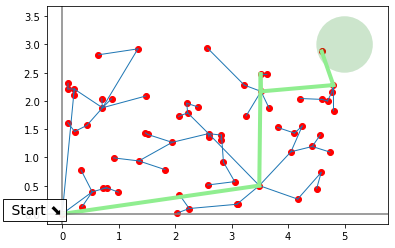

In [59]:
%matplotlib inline 
def plotRRT(succeeded, graph, winpath=None, goal_state = (5,3), goalRadius=0.5):
    plt.figure()
    #plt.axes()
    goal = plt.Circle(goal_state, radius=goalRadius, fc='g', alpha=0.2)
    plt.gca().add_patch(goal)
    
    plt.text(0,0, ' Start ⬊', fontsize=14, bbox=dict(alpha=0.9, fc='white'), ha='right')
    plt.scatter(0,0, )
    for edge in graph.edgeslist:
        ptA, ptB = edge[0], edge[1]
        # x1 x2 y1 y2
        line = plt.Line2D((ptA[0], ptB[0]), (ptA[1], ptB[1]), lw=1)
        plt.gca().add_line(line)
    for node in graph.nodeslist:
        #print(node)
        plt.scatter(node[0], node[1], color='red')
    if winpath:
        for e in winpath:
            print('e',e)
            ptA, ptB = e[0], e[1]
            line = plt.Line2D((ptA[0], ptB[0]), (ptA[1], ptB[1]), c='lightgreen', lw=4)
            plt.gca().add_line(line)
            
    plt.axhline(0,color='gray') # x = 0
    plt.axvline(0,color='gray') # y = 0
    plt.axis('scaled')
    plt.subplots_adjust(left=-1)
    plt.show()
    
    
    
#my_fig = plotRRT(True, rrt_graph)
print(winpath)
my_fig = plotRRT(True, rrt_graph, winpath)
    

In [57]:
print(rrt_graph.edgeslist)

[((0, 0), (3.4896710021933517, 0.5015537921052062)), ((0, 0), (0.21398215127016118, 2.21123273480751)), ((3.4896710021933517, 0.5015537921052062), (3.0929764194693736, 0.17073790089181384)), ((3.4896710021933517, 0.5015537921052062), (3.5122479565846594, 2.4730316749205157)), ((3.4896710021933517, 0.5015537921052062), (2.5910509229700103, 1.4220432770926128)), ((3.5122479565846594, 2.4730316749205157), (3.519955380668805, 2.1693668283213574)), ((0, 0), (0.5316261862921534, 0.3902586769863904)), ((2.5910509229700103, 1.4220432770926128), (1.9466926708578698, 1.267208909057742)), ((2.5910509229700103, 1.4220432770926128), (2.820387045339045, 1.394556636641517)), ((3.4896710021933517, 0.5015537921052062), (4.050352313656445, 1.100328737030109)), ((3.0929764194693736, 0.17073790089181384), (2.248189509025116, 0.09530326121110633)), ((3.519955380668805, 2.1693668283213574), (4.800953377084769, 2.281535710099928)), ((3.519955380668805, 2.1693668283213574), (3.2234474558165536, 2.281442680202

In [47]:
# from copy import deepcopy
def calcWinPath(graph):
    # assume first node added is start state; last node added is node in goal region 
    path = []
    path.append(graph.edgeslist[-1])
    g = deepcopy(graph)
    DEBUG = True
    MAXITER = 99999
    if DEBUG:
        MAXITER = 5 
    
    def findPrevEdge(edge):
        e = None
        for nIters, e in enumerate(g.edgeslist):
            if nIters > MAXITER:
                print(nIters, 'BREAK')
                break
            nIters += 1
            if e[1] == edge[0]:
                g.edgeslist.remove(e)
                break
        return e
    
    success = False
    prevEdge = graph.edgeslist[-1]
    nIters = 0
    while nIters < MAXITER and not success:
        nIters += 1
        prevEdge = findPrevEdge(prevEdge)
        path.append(prevEdge)
        if prevEdge[0] == (0,0):
            success = True
    return success, path
    
success, winpath = calcWinPath(rrt_graph)
print(success, winpath)
#print(rrt_graph.edgeslist)

6 BREAK
True [((4.594387965180099, 2.202840482091035), (4.884421588828186, 2.5669163806157296)), ((4.977129798317147, 0.4620183388911051), (3.4077156018317916, 1.4636215982524725)), ((0.21886320105919954, 0.7846692226564804), (4.977129798317147, 0.4620183388911051)), ((0, 0), (0.21886320105919954, 0.7846692226564804))]


In [48]:
%matplotlib inline 

rrt_fig.show()

NameError: name 'rrt_fig' is not defined

In [ ]:
# OLD SCRATCH
# from copy import deepcopy
def calcWinPath(graph):
    # assume first node added is start state; last node added is node in goal region 
    path = []
    goal_state = graph.nodeslist[-1]
    g = deepcopy(graph)
    
    def findPrevEdge(edge):
        maxiter = 5
        nIters = 0
        e = None
        while nIters < maxiter:
            for e in g.edgeslist:
                nIters += 1
                print('find', nIters, 'edge', edge, 'e', e)
                if e[1] == edge[0]:
                    g.edgeslist.remove(e)
                    print('found prev edge', edge, e)
                    break
            break
        return e
    
    edge = graph.edgeslist[-1]
    success = False
    
    while not success:
        prevEdge = findPrevEdge(edge)
        path.append(prevEdge)
        if prevEdge[0] == (0,0):
            success = True
    return success, path
    
success, winpath = calcWinPath(rrt_graph)
print(success, winpath)

# 

# 

In [ ]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget
# aka import ipympl

import matplotlib.pyplot as plt
import numpy as np

plt.plot([0, 1, 2, 2])
plt.plot([1, 1, 2, 2])
plt.show()


In [ ]:


ax = plt.figure().add_subplot(projection='3d')

# Prepare arrays x, y, z
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()


In [ ]:
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
n = Node(1,2)
print(n)
print(n.x)

In [ ]:

class FancyNode(Node):
    def __init__(location, ID, parentNode):
        super().__init__(location)
        self.ID = ID
        self.parentNode = parentNode
    

In [ ]:
#edge: startID, endID? or just define by the two x,y coordinates

class Graph:
    def __init__(self):
        self.startstate = (0,0)
        self.goalstate = (0,0)
        
        self.nodeslist = []
        self.edgeslist = []
    
class RRTstar:
    def __init__(self):
        self.graph = Graph()
        self.iterations = 0
        self.limit_iters = 1000
    
    def sampleFree:
        pass
    
    def chain(oldPt, newPt, connectRadius)
        dist = calcDist(oldPt, newPt)
        if dist > connectRadius:
            # if newPt is too far from NN, truncate to be closer
            newPt = oldPt + self.connectRadius
        return newPt
    
    def isColliding:
        pass
    
    def nearest(point, nodeslist):
        return nearestNode
    
    def inGoalRegion(pt, pt_goal):
        return False
    
    def pathCost(solpath):
        return 0
    
    def calc_distance(fromPt, toPt):
        return 0
    
    def run_rrt():
        while iterations < limit_iters:
            newPt = random()
            if isColliding(newPt):
                continue
            nearestPt = nearest(self.graph, newPt)
            link = chain(newPt, nearestPt)
            self.graph.append(link)
            if inGoalRegion(newPt):
                return 'success', self.graph
        return 'failure', self.graph
            
            
        

In [ ]:
#edge: startID, endID? or just define by the two x,y coordinates

class Graph:
    def __init__(self):
        self.startstate = (0,0)
        self.goalstate = (0,0)
        
        self.nodeslist = []
        self.edgeslist = []
    
class RRTstar:
    def __init__(self):
        self.graph = Graph()
        self.iterations = 0
        self.limit_iters = 1000
    
    def sampleFree:
        pass
    
    def chain(oldPt, newPt, connectRadius)
        dist = calcDist(oldPt, newPt)
        if dist > connectRadius:
            # if newPt is too far from NN, truncate to be closer
            newPt = oldPt + self.connectRadius
        return newPt
    
    def isColliding:
        pass
    
    def nearest(point, nodeslist):
        return nearestNode
    
    def inGoalRegion(pt, pt_goal):
        return False
    
    def pathCost(solpath):
        return 0
    
    def calc_distance(fromPt, toPt):
        return 0
    
    def run_rrt():
        while iterations < limit_iters:
            newPt = random()
            if isColliding(newPt):
                continue
            nearestPt = nearest(self.graph, newPt)
            link = chain(newPt, nearestPt)
            self.graph.append(link)
            if inGoalRegion(newPt):
                return 'success', self.graph
        return 'failure', self.graph
            
            
        